In [31]:
import pandas as pd
import nltk
nltk.download('gutenberg')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [32]:
from nltk.corpus import gutenberg

In [33]:
## Loading Dataset
data=gutenberg.raw('shakespeare-hamlet.txt')
## Save Txt
with open('shakespeare.txt','w') as file:
    file.write(data)

#### **Data preprocessing**

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [35]:
## Applying pad_Sequence to make each sentence of same length
# Tokenizer for converting into vectors

with open('shakespeare.txt','r') as file:
    text=file.read().lower()

## Tokenize
tokens=Tokenizer()
tokens.fit_on_texts([text])
total_words=len(tokens.word_index) +1
total_words


4818

In [36]:
## input Sequences
input_sequence=[]
for line in text.split('\n'):
    tokens_list=tokens.texts_to_sequences([line])[0]
    for i in range(1,len(tokens_list)):
        n_gram_sequence=tokens_list[:i+1]
        input_sequence.append(n_gram_sequence)


In [37]:
##using pad sequence to make all of same length
input_sequence


[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [38]:
max_sequence=max([len(x) for x in input_sequence])
print(max_sequence)

14


In [39]:
input_sequences=np.array(pad_sequences(input_sequence,maxlen=max_sequence))

### **create predictor and label**

In [40]:
x,y=input_sequences[:,:-1],input_sequences[:,-1]

In [41]:
y=tf.keras.utils.to_categorical(y,num_classes=total_words)

In [42]:
### Train test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [43]:
## Develop LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,LSTM,Dropout

In [44]:
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_sequence))
model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words,activation='softmax'))

## building model
model.build(input_shape=(None, max_sequence))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [45]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 14, 100)        │       481,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 14, 150)        │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4818)           │       486,618 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,219,418 (4.65 MB)

 Trainable params: 1,219,418 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
## Create instance of Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [48]:
history=model.fit(
    X_train,y_train,epochs=150,validation_data=(X_test,y_test),
    verbose=1,batch_size=64,  # Adjust batch size as needed
)

Epoch 1/150
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0279 - loss: 7.2646 - val_accuracy: 0.0334 - val_loss: 6.8367
Epoch 2/150
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0342 - loss: 6.4700 - val_accuracy: 0.0336 - val_loss: 6.9522
Epoch 3/150
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0392 - loss: 6.3735 - val_accuracy: 0.0435 - val_loss: 7.0013
Epoch 4/150
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0469 - loss: 6.2630 - val_accuracy: 0.0542 - val_loss: 7.0143
Epoch 5/150
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0529 - loss: 6.1566 - val_accuracy: 0.0492 - val_loss: 7.0259
Epoch 6/150
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0523 - loss: 6.0638 - val_accuracy: 0.0528 - val_loss: 7.0242
Epoch 7/150
322/322 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0563 - loss: 5.9662 - val_accuracy: 0.0513 - val_loss: 7.0200
Epoch 8/150
322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0612 - loss: 5.8678 - val

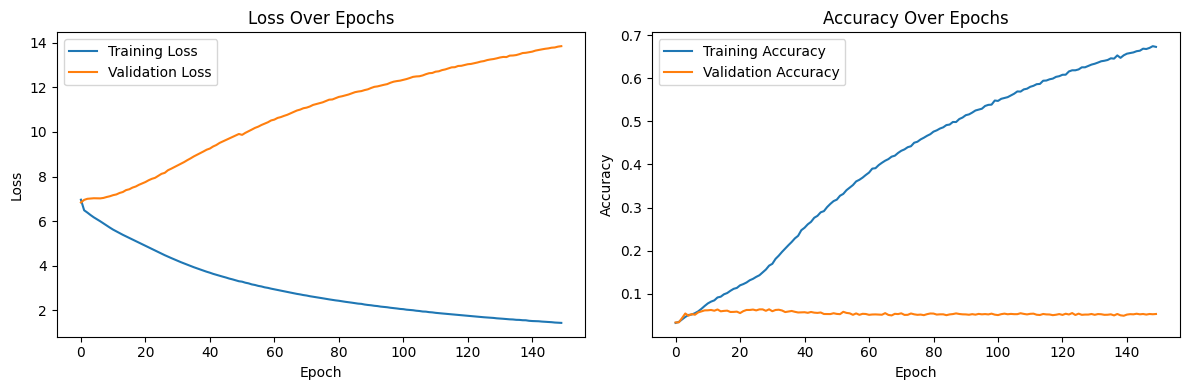

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
model.save('model.h5')

AttributeError: 'NoneType' object has no attribute 'save'

In [64]:
def sample_with_temperature(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-7) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)



def predict_next_word(seed_text, model, tokenizer, max_sequence_len, num_words=1):
    """
    Predict the next word(s) for a given seed text using the trained model.

    Parameters:
    - seed_text: Starting text input
    - model: Trained Keras model
    - tokenizer: Fitted Tokenizer
    - max_sequence_len: Max sequence length used during training
    - num_words: Number of words to predict

    Returns:
    - Extended text with predicted word(s)
    """
    output_text = seed_text
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([output_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = sample_with_temperature(predicted[0], temperature=0.8)


        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_text += ' ' + word
                break

    return output_text


In [69]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

seed_text = "alas poor yorick i knew"
predicted_line = predict_next_word(seed_text, model, tokens, max_sequence, num_words=5)
print(predicted_line)


alas poor yorick i knew him tremble at leaue her
